# C2(Command & Control) server detection

https://www.stratosphereips.org/datasets-ctu13

In [56]:
!pip install xgboost

In [57]:
import pickle
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [58]:
file = open('CTU13Scenario1flowData.pickle', 'rb')
c2_dataset = pickle.load(file, encoding='iso-8859-1')

In [59]:
X_train, y_train, X_test, y_test = (c2_dataset[0], c2_dataset[1], c2_dataset[2], c2_dataset[3])

In [60]:
clf = RandomForestClassifier(n_estimators=100, max_depth=4)

In [61]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [62]:
score = clf.score(X_test, y_test)
print(f"Score: {score*100:.4f} %")

Score: 99.7401 %


In [63]:
clf = AdaBoostClassifier(n_estimators=100)

In [64]:
clf.fit(X_train, y_train)

D:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [65]:
score = clf.score(X_test, y_test)
print(f"Score: {score*100:.4f} %")

Score: 99.9000 %


In [66]:
xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', max_depth=6, learning_rate=0.1, n_estimators=100, n_jobs=-1)

In [67]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
score = xgb.score(X_test, y_test)
print(f"Score: {score*100:.4f} %")

Score: 99.9000 %


In [69]:
importances = xgb.feature_importances_

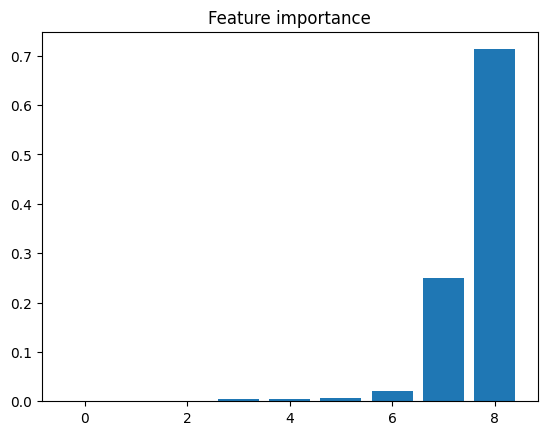

In [70]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title('Feature importance')
plt.bar(range(len(importances)), importances[indices_sorted])
plt.show()